# 14章　データ分析の実例

## 14.1 短縮URL Bitlyにおける1.usa.govへの変換データ

In [1]:
import pandas as pd
import numpy as np

In [6]:
path = 'pydata-book-2nd-edition/datasets/bitly_usagov/example.txt'

In [7]:
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [9]:
# JOSN文字列をdictオブジェクトに変換する
# recordsオブジェクトはPythonディクショナリのリスト
import json
records = [json.loads(line) for line in open(path)]
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

## 14.1.1 Python標準機能でのタイムゾーン情報の集計

In [15]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

In [16]:
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [36]:
# 標準ライブラリを使ってタイムゾーンごとの集計
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] +=1
        else:
            counts[x] = 1
    return counts

In [37]:
# 標準ライブラリのdefaltdictをつかう
from collections import defaultdict

def get_counts2(sequence):
    counts = defaultdict(int)
    
    for x in sequence:
        counts[x] +=1
    return counts

In [42]:
counts = get_counts(time_zones)
counts['America/New_York']

1251

In [40]:
len(time_zones)

3440

In [46]:
# timezonesの上位10件を調べる
def top_counts(counts_dict, n= 10):
    value_key_pairs = [(count, tz) for tz, count in counts_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [47]:
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [48]:
# Python標準ライブラリのcollection.Counterを使うと簡単

In [49]:
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

## 14.1.2 pandasを使用したタイムゾーン情報の集計

In [50]:
frame = pd.DataFrame(records)
frame.head()

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN


In [51]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
a              3440 non-null object
c              2919 non-null object
nk             3440 non-null float64
tz             3440 non-null object
gr             2919 non-null object
g              3440 non-null object
h              3440 non-null object
l              3440 non-null object
al             3094 non-null object
hh             3440 non-null object
r              3440 non-null object
u              3440 non-null object
t              3440 non-null float64
hc             3440 non-null float64
cy             2919 non-null object
ll             2919 non-null object
_heartbeat_    120 non-null float64
kw             93 non-null object
dtypes: float64(4), object(14)
memory usage: 500.8+ KB


In [52]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [53]:
tz_counts = frame['tz'].value_counts()
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [55]:
# タイムゾーン情報が欠落している箇所はfillnaで’Missing'
# 空文字の場合はブールインデックス参照で'Unknown'

clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'unknown'
tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

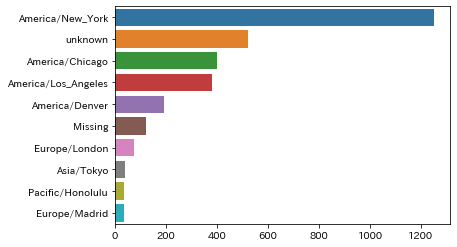

In [63]:
import seaborn as sns
subset = tz_counts[:10]
sns.barplot(y = subset.index, x= subset.values )

In [66]:
# ユーザの使用ブラウザ傾向を把握する
frame['a'].head()

0    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
1                               GoogleMaps/RochesterNY
2    Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
3    Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...
4    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
Name: a, dtype: object

In [68]:
results = pd.Series(x.split()[0] for x in frame['a'].dropna())
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [69]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

In [99]:
# windowsユーザと非windowsユーザを分ける
cframe = frame[frame.a.notnull()].copy()
cframe['os'] =  np.where(cframe['a'].str.contains('Windows'),
                       'Windows','Not Windows')

cframe['os'][:5]

0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

In [100]:
# タイムゾーンとosの組み合わせごとにグループ化
by_tz_os = cframe.groupby(['tz', 'os'])

In [104]:
# sizeを用いてタイムゾーンとos組み合わせの出現回数を集計
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts[:10]

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [105]:
# タイムゾーン全体の中で上位を選ぶ
# argsort()はソート結果のインデックスを戻す
# 例：Africa/Ceutaはソート結果が3番目でagg_countsのindex番号92番目という意味
indexer = agg_counts.sum(1).argsort()
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [137]:
# 得られたlindexer配列から末尾10件を取得
count_subset = agg_counts.take(indexer[-10:])
count_subset

# 上記式と等価
# a = indexer[-10:]
# agg_counts.iloc[a,:]

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [131]:
# 上位10件をnlargestで実現できる
agg_counts.sum(1).nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

In [138]:
count_subset = count_subset.stack()
count_subset.name = 'total'
count_subset = count_subset.reset_index()
count_subset[:10]

,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Not Windows,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Not Windows,43.0
9,Europe/London,Windows,31.0


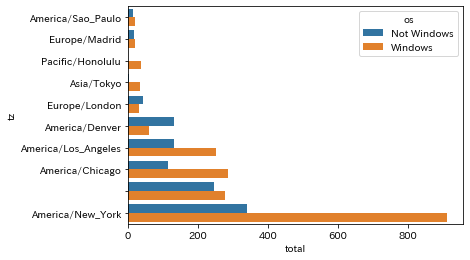

In [139]:
sns.barplot(x = 'total',y = 'tz', hue='os', data=count_subset)

In [140]:
# 各行が合計1となるように正規化
def norm_total(group):
    group['normed_total'] = group.total / group.total.sum()
    return group

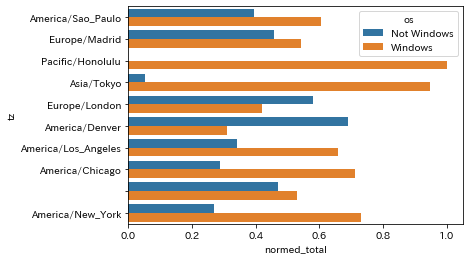

In [143]:
results = count_subset.groupby('tz').apply(norm_total)
sns.barplot(x='normed_total', y = 'tz', hue='os', data=results)

In [144]:
# groupbyのtransformメソッドで次のように書ける
g = count_subset.groupby('tz')
results2 = count_subset.total / g.total.transform('sum')

## 14.2 MovieLens 1M(映画評価データ)

In [10]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('pydata-book-2nd-edition/datasets/movielens/users.dat', sep='::',header=None, names=unames)

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('pydata-book-2nd-edition/datasets/movielens/ratings.dat', sep='::',header=None, names=rnames)

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('pydata-book-2nd-edition/datasets/movielens/movies.dat', sep='::',header=None, names=mnames)                      

C:\Users\mikam\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\mikam\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """
C:\Users\mikam\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [11]:
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [12]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [14]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [16]:
# テーブルをマージする
data = pd.merge(pd.merge(ratings,users), movies)
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


In [19]:
# 映画に対して性別ごとの平均評価
mean_ratigs = data.pivot_table('rating', index='title',
                              columns='gender', aggfunc='mean')
mean_ratigs[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [21]:
# 分析対象として250件以上のレビュー映画を探す
ratings_title= data.groupby('title').size()
ratings_title[:10]

title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

In [23]:
active_titles = ratings_title.index[ratings_title >= 250]
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [27]:
mean_ratings = mean_ratigs.loc[active_titles]
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


In [30]:
# 女性評価の高いもの10件を見る
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


## 14.2.1 評価の分かれた映画の抽出

In [31]:
# 男性評価平均と女性評価平均の差を見る
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

In [33]:
sorted_by_diff = mean_ratings.sort_values(by='diff')
sorted_by_diff[:10]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


In [34]:
# 逆順に並べて最初の10件を表示する
sorted_by_diff[::-1][:10]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


In [35]:
# 映画タイトルごとの評価値の標準偏差の計算
rating_std_by_title= data.groupby('title')['rating'].std()

In [37]:
# 評価件数250件以上の映画のみ抽出
rating_std_by_title = rating_std_by_title.loc[active_titles]

In [38]:
# 得られたSeriesオブジェクトを降順でソート
rating_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

## 14.3 アメリカの赤ちゃんに名付けられた名前リスト(1880-2010)

In [2]:
names1880 = pd.read_csv('pydata-book-2nd-edition/datasets/babynames/yob1880.txt',
                       names=['name', 'sex', 'birth'])
names1880

,name,sex,birth
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [3]:
# 性別出生数
names1880.groupby('sex').birth.sum()

sex
F     90993
M    110493
Name: birth, dtype: int64

In [4]:
# 年代別のファイルを1個のdfにまとめる
years = range(1880, 2011)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'pydata-book-2nd-edition/datasets/babynames/yob{}.txt'.format(year)
    frame = pd.read_csv(path, names=columns)
    
    frame['year'] = year
    pieces.append(frame) 

# オリジナルの行番行が不要の為indexを無視    
names = pd.concat(pieces, ignore_index=True)    
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [5]:
total_births = names.pivot_table('births', index='year',columns='sex', aggfunc=sum)
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


In [6]:
total_births.plot(title='Total births by sex and year')

In [7]:
# propという名前で全出生数に対するその名前の割合を調べる
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group

names = names.groupby(['year', 'sex']).apply(add_prop)
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [8]:
# グループの足し合わせ１にして検算を実施

names.groupby(['year', 'sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

In [9]:
# 上位1000件の名前がどのようなものかgroupbyで行う
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
top1000.reset_index(inplace=True, drop=True)

In [10]:
# 上記をループでやる場合
pieces = []
for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_values(by='births', ascending=False)[:1000])
top1000 = pd.concat(pieces, ignore_index=True)    

In [11]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


## 14.3.1 名付けの傾向分析

In [12]:
# top1000を男女別に選り分ける

boys = top1000[top1000.sex == 'M' ]
girls = top1000[top1000.sex == 'F']

In [13]:
total_births = top1000.pivot_table('births', index ='year',
                                  columns='name', aggfunc=sum)
total_births

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,NaN,3737.0,NaN,8279.0,NaN,NaN,297.0,NaN,404.0,440.0,...,NaN,5145.0,2839.0,530.0,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,3941.0,NaN,8914.0,NaN,NaN,313.0,NaN,349.0,468.0,...,NaN,4925.0,3028.0,526.0,NaN,NaN,NaN,NaN,NaN,NaN
2008,955.0,4028.0,219.0,8511.0,NaN,NaN,317.0,NaN,344.0,400.0,...,NaN,4764.0,3438.0,492.0,NaN,NaN,NaN,NaN,NaN,NaN


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E9EA358788>,
      dtype=object)

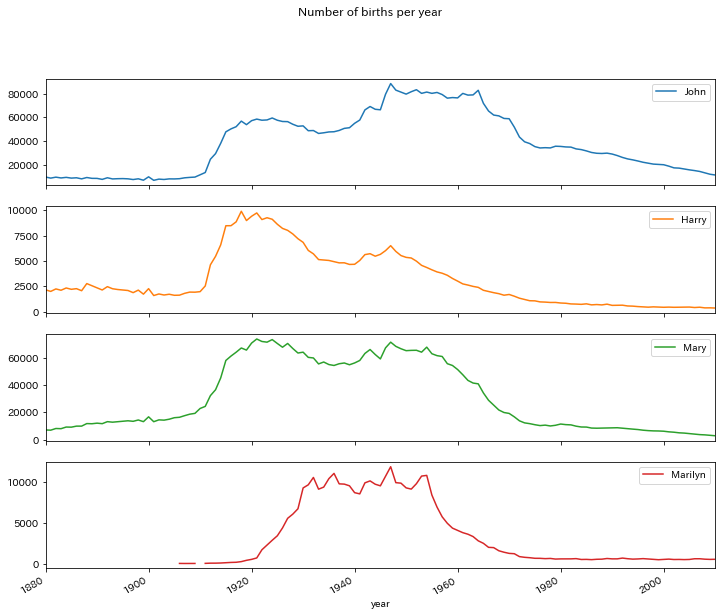

In [14]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

subset.plot(subplots=True, figsize=(12, 10), grid= False,
           title ='Number of births per year')

## 14.3.1.1 多様化していく名付け

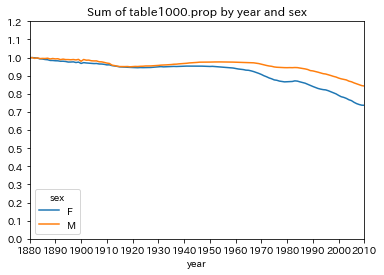

In [15]:
table = top1000.pivot_table('prop', index='year',columns='sex', aggfunc=sum)

table.plot(title='Sum of table1000.prop by year and sex',
           yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

In [16]:
# その年の出生数の半分が何種類の名前で構成されているか

df = boys[boys.year== 2010]
df

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [17]:
# propを降順にソートし何番目が50%に達するか
# numpyのserchsortedで配列要素から何番目かを調べる事ができる

prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum[:10]

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
Name: prop, dtype: float64

In [18]:
prop_cumsum.values.searchsorted(0.5)

116

In [19]:
def get_quantile_count(group, q = 0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1

In [20]:
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')

diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


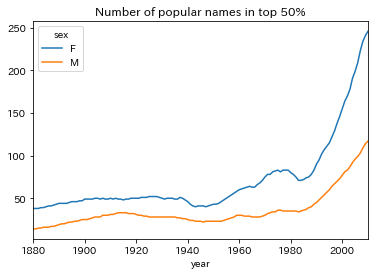

In [21]:
diversity.plot(title='Number of popular names in top 50%')

## 14.3.1.2 名前「末尾一文字」の変化

In [26]:
# 名前列から末尾文字を抽出
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last letter'

table = names.pivot_table('births', index = last_letters,
                         columns=['sex', 'year'], aggfunc = sum)

table

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last letter                                                                  
a            31446.0  31581.0  36536.0  38330.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33378.0  34080.0  40399.0  41914.0  48089.0  49616.0  53884.0   
f                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
g                7.0      5.0     12.0      8.0     24.0     11.0     18.0   
h             4863.0   4784.0   5567.0   5701.0   6602.0   6624.0   7146.0   
i               61.0     78.0     81.0     76.0     84.0     92.0     85.0   
j                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
k               13.0     15.0     11.0     17.0     21.0     18.0     27.0   
l             2541.0   2911.0   3527.0   3848.0   4808.0   5144.0   5721.0   
m               58.0     57.0     81.0     86.0     79.0     75.0    103.0   
n             3008.0   2959.0   3576.0   3837.0   4507.0   4735.0   5242.0   
o               30.0     49.0     35.0     47.0     74.0     84.0     93.0   
p                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
q                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
r              481.0    417.0    590.0    640.0    718.0    799.0    917.0   
s             1391.0   1316.0   1637.0   1794.0   2039.0   2127.0   2524.0   
t             2152.0   2165.0   2399.0   2554.0   2825.0   2889.0   3017.0   
u              380.0    427.0    410.0    444.0    490.0    495.0    511.0   
v                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
w                NaN      5.0      NaN      NaN      NaN      NaN      5.0   
x                NaN      NaN      NaN      7.0      NaN      NaN      NaN   
y            10469.0  10404.0  12145.0  12063.0  13917.0  13927.0  14936.0   
z              106.0     95.0    106.0    141.0    148.0    150.0    202.0   

sex                                     ...         M                      \
year            1887     1888     1889  ...      2001      2002      2003   
last letter                             ...                                 
a            48942.0  59442.0  58631.0  ...   39124.0   38815.0   37825.0   
b                NaN      NaN      NaN  ...   50950.0   49284.0   48065.0   
c                NaN      NaN      NaN  ...   27113.0   27238.0   27697.0   
d             1027.0   1298.0   1374.0  ...   60838.0   55829.0   53391.0   
e            54353.0  66750.0  66663.0  ...  145395.0  144651.0  144769.0   
f                NaN      NaN      NaN  ...    1758.0    1817.0    1819.0   
g               25.0     44.0     28.0  ...    2151.0    2084.0    2009.0   
h             7141.0   8630.0   8826.0  ...   85959.0   88085.0   88226.0   
i              105.0    141.0    134.0  ...   20980.0   23610.0   26011.0   
j                NaN      NaN      NaN  ...    1069.0    1088.0    1203.0   
k               19.0     21.0     22.0  ...   42477.0   42043.0   42296.0   
l             6175.0   7900.0   8395.0  ...  153648.0  153493.0  153862.0   
m               90.0    123.0    137.0  ...   41967.0   42663.0   42790.0   
n             5512.0   6833.0   7103.0  ...  616099.0  630322.0  663419.0   
o               97.0    134.0    142.0  ...   82146.0   83180.0   85423.0   
p                NaN      NaN      NaN  ...    3419.0    3157.0    2982.0   
q                NaN      NaN      NaN  ...     602.0     618.0     585.0   
r              910.0   1207.0   1214.0  ...  165377.0  164821.0  169878.0   
s             2803.0   3582.0   3569.0  ...  143791.0  139595.0  138632.0   
t             3140.0   3816.0   3784.0  ...

In [27]:
# 1910年、1960年、2010年と取り出す
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [28]:
# 年度で比較できるように集計数を各年度の全出生数で割り、正規化する
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [30]:
letter_prop = subtable / subtable.sum()
letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
f                 NaN  0.000010  0.000055  0.000783  0.004325  0.001188
g            0.000144  0.000157  0.000374  0.002250  0.009488  0.001404
h            0.051529  0.036224  0.075852  0.045562  0.037907  0.051670
i            0.001526  0.039965  0.031734  0.000844  0.000603  0.022628
j                 NaN       NaN  0.000090       NaN       NaN  0.000769
k            0.000121  0.000156  0.000356  0.036581  0.049384  0.018541
l            0.043189  0.033867  0.026356  0.065016  0.104904  0.070367
m            0.001201  0.008613  0.002588  0.058044  0.033827  0.024657
n            0.079240  0.130687  0.140210  0.143415  0.152522  0.362771
o            0.001660  0.002439  0.001243  0.017065  0.012829  0.042681
p            0.000018  0.000023  0.000020  0.003172  0.005675  0.001269
q                 NaN       NaN  0.000030       NaN       NaN  0.000180
r            0.013390  0.006764  0.018025  0.064481  0.031034  0.087477
s            0.039042  0.012764  0.013332  0.130815  0.102730  0.065145
t            0.027438  0.015201  0.007830  0.072879  0.065655  0.022861
u            0.000684  0.000574  0.000417  0.000124  0.000057  0.001221
v                 NaN  0.000060  0.000117  0.000113  0.000037  0.001434
w            0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x            0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y            0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z            0.002439  0.000659  0.000704  0.000170  0.000184  0.001831

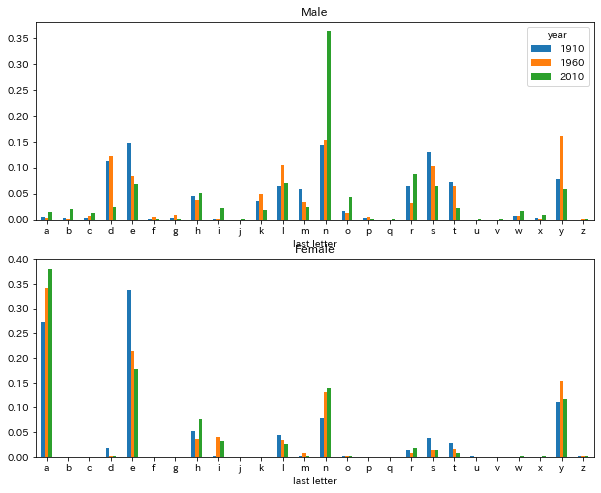

In [31]:
# グラフ化
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2,1, figsize=(10,8))
letter_prop['M'].plot(kind= 'bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind= 'bar', rot=0, ax=axes[1], title='Female',legend=False)

In [32]:
# 男子の末尾文字[d],[n],[y]について正規化して比較

letter_prop = table / table.sum()
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T
dny_ts.head()

last letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


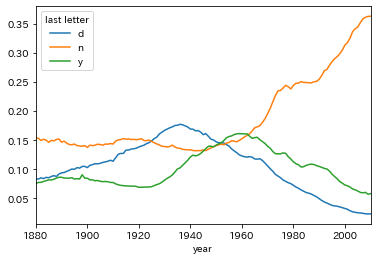

In [33]:
dny_ts.plot()

## 14.3.1.3 男の子の名前として定着した女の子の名前（あるいは逆）

In [44]:
# [lesl]で始まる名前の一覧を計算する

all_names = pd.Series(top1000.name.unique())
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]

lesley_like


632     Leslie
2294    Lesley
4262    Leslee
4728     Lesli
6103     Lesly
dtype: object

In [45]:
filtered = top1000[top1000.name.isin(lesley_like)]

filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [46]:
# 年代・性別順に正規化

table = filtered.pivot_table('births', index='year',
                            columns='sex', aggfunc='sum')

In [47]:
table

sex,F,M
year,,
1880,8.0,79.0
1881,11.0,92.0
1882,9.0,128.0
1883,7.0,125.0
1884,15.0,125.0
...,...,...
2006,4166.0,NaN
2007,3805.0,NaN
2008,3022.0,NaN


In [48]:
table = table.div(table.sum(1), axis=0)
table.head()

sex,F,M
year,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857


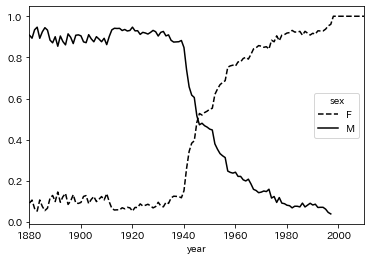

In [50]:
table.plot(style={'M': 'k-', 'F': 'k--'})

## 14.4 アメリカ合衆国農務省の食糧データベース

In [2]:
import json

db = json.load(open('pydata-book-2nd-edition/datasets/usda_food/database.json'))

len(db)

6636

In [3]:
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [4]:
db[0]['nutrients'][0]

{'value': 25.18,
 'units': 'g',
 'description': 'Protein',
 'group': 'Composition'}

In [5]:
nutrients = pd.DataFrame(db[0]['nutrients'])
nutrients[:7]

,value,units,description,group
0,25.18,g,Protein,Composition
1,29.20,g,Total lipid (fat),Composition
2,3.06,g,"Carbohydrate, by difference",Composition
3,3.28,g,Ash,Other
4,376.00,kcal,Energy,Energy
5,39.28,g,Water,Composition
6,1573.00,kJ,Energy,Energy


In [6]:
# 食品名に対して属する食品カテゴリとID、生産者を抽出
info_keys= ['description', 'group', 'id', 'manufacturer']

info = pd.DataFrame(db, columns=info_keys)
info[:5]

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [7]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
description     6636 non-null object
group           6636 non-null object
id              6636 non-null int64
manufacturer    5195 non-null object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [8]:
# 食品カテゴリの出現頻度を確認
info['group'].value_counts()[:10]

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Fast Foods                           365
Legumes and Legume Products          365
Lamb, Veal, and Game Products        345
Sweets                               341
Pork Products                        328
Fruits and Fruit Juices              328
Name: group, dtype: int64

In [9]:
#食品に含まれている栄養素を１つの巨大な表にまとめる

nutrients= []

for rec in db:
    fnuts = pd.DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)

In [10]:
nutrients = pd.concat(nutrients, ignore_index=True)
nutrients

,value,units,description,group,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


In [11]:
# 重複を削除
nutrients.duplicated().sum()

14179

In [12]:
nutrients = nutrients.drop_duplicates()

In [13]:
# infoとnutrients両方のオブジェクトでgroupとdescriptionの名前が重なっているので変更
col_mapping = {'description' : 'food',
              'group'        : 'fgroup'}

info = info.rename(columns=col_mapping, copy=False)
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
food            6636 non-null object
fgroup          6636 non-null object
id              6636 non-null int64
manufacturer    5195 non-null object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [14]:
col_mapping = {'description' : 'nutrient', 'group' : 'nutgroup'}
nutrients = nutrients.rename(columns=col_mapping,copy = False)
nutrients

,value,units,nutrient,nutgroup,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


In [15]:
# infoとnutrientsをマージ
ndata = pd.merge(nutrients, info , on='id', how='outer')
ndata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 375175
Data columns (total 8 columns):
value           375176 non-null float64
units           375176 non-null object
nutrient        375176 non-null object
nutgroup        375176 non-null object
id              375176 non-null int64
food            375176 non-null object
fgroup          375176 non-null object
manufacturer    293054 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 25.8+ MB


In [16]:
ndata.iloc[30000]

value                                             0.04
units                                                g
nutrient                                       Glycine
nutgroup                                   Amino Acids
id                                                6158
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object

In [17]:
# 食品部ループごとに含まれる亜鉛の中央値
result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5)

In [18]:
result['Zinc, Zn'].sort_values().plot(kind='barh')

In [30]:
# ある栄養素に対してどの食品が最も含有率が高いか？

by_nutrient = ndata.groupby(['nutgroup', 'nutrient'])

get_maximum = lambda x : x.loc[x.value.idxmax()]
get_mininum = lambda x : x.loc[x.value.idxmin()]

max_foods = by_nutrient.apply(get_maximum)[['value', 'food']]


max_foods.loc['Amino Acids']['food']

nutrient
Alanine                           Gelatins, dry powder, unsweetened
Arginine                               Seeds, sesame flour, low-fat
Aspartic acid                                   Soy protein isolate
Cystine                Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                   Soy protein isolate
Glycine                           Gelatins, dry powder, unsweetened
Histidine                Whale, beluga, meat, dried (Alaska Native)
Hydroxyproline    KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...
Isoleucine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Leucine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Lysine            Seal, bearded (Oogruk), meat, dried (Alaska Na...
Methionine                    Fish, cod, Atlantic, dried and salted
Phenylalanine     Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Proline                           Gelatins, dry powder, unsweetened
Serine            Soy protein isolate, 

## 14.5 2012年度連邦選挙委員会データベース

In [32]:
fec = pd.read_csv('pydata-book-2nd-edition/datasets/fec/P00000001-ALL.csv')

C:\Users\mikam\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [34]:
fec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


In [36]:
fec.iloc[123456]

cmte_id                             C00431445
cand_id                             P80003338
cand_nm                         Obama, Barack
contbr_nm                         ELLMAN, IRA
contbr_city                             TEMPE
contbr_st                                  AZ
contbr_zip                          852816719
contbr_employer      ARIZONA STATE UNIVERSITY
contbr_occupation                   PROFESSOR
contb_receipt_amt                          50
contb_receipt_dt                    01-DEC-11
receipt_desc                              NaN
memo_cd                                   NaN
memo_text                                 NaN
form_tp                                 SA17A
file_num                               772372
Name: 123456, dtype: object

In [39]:
# 所属政党の情報を追加する為の準備
unique_cands = fec['cand_nm'].unique()
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [40]:
# 候補者ごとの所属政党を作成

parties = {'Bachmann, Michelle': 'Republican',
           'Romney, Mitt' : 'Republican',
           'Obama, Barack': 'Democrat',
            "Roemer, Charles E. 'Buddy' III" : 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Johnson, Gary Earl' : 'Republican',
           'Paul, Ron': 'Republican',
           'Santorum, Rick' : 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Perry, Rick': 'Republican'}

In [41]:
# ある連続した5レコードの候補者情報
fec.cand_nm[123456:123461]

123456    Obama, Barack
123457    Obama, Barack
123458    Obama, Barack
123459    Obama, Barack
123460    Obama, Barack
Name: cand_nm, dtype: object

In [42]:
fec.cand_nm[123456:123461].map(parties)

123456    Democrat
123457    Democrat
123458    Democrat
123459    Democrat
123460    Democrat
Name: cand_nm, dtype: object

In [45]:
# シリーズオブジェクト全体にマッピング
fec['party'] = fec.cand_nm.map(parties)
fec['party'].value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

In [46]:
# 寄付金額に正と負の値が混在
(fec['contb_receipt_amt'] > 0).value_counts()

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

In [48]:
# 負の寄付金額を除外
fec = fec[fec.contb_receipt_amt> 0]

In [49]:
#候補者二人に対するサブセットを作成
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack','Romney, Mitt' ])]

## 14.5.1 職業別・雇用者別の寄付の分析

In [50]:
# 職業別の総寄付金額を算出
fec.contbr_occupation.value_counts()[:10]

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: contbr_occupation, dtype: int64

In [52]:
# 職業に対して複数の変種があるのでmapping
occ_mapping = {
    'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
    'INFORMATION REQUESTED' : 'NOT PROVIDED',
    'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
    'E.E.O.' : 'CEO'
}

#　dict.get(k,d)はdictにkのエントリがあればそれを返し、なければdを返す
f = lambda x : occ_mapping.get(x,x)
fec.contvr_occupation = fec.contbr_occupation.map(f)

C:\Users\mikam\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  # Remove the CWD from sys.path while we load stuff.


In [55]:
# 雇用者についても同様

emp_mapping ={
    'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
    'INFORMATION REQUESTED' : 'NOT PROVIDED',
    'SELF' : 'SELF-EMPLOYED',
    'SELF EMPLOYED' : 'SELF-EMPLOYED',
}

In [56]:
# マッピング出来ない場合はXを返す
f = lambda x: emp_mapping.get(x,x)
fec.contbr_employer = fec.contbr_employer.map(f)

C:\Users\mikam\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [57]:
# 職業と支持政党で分類し、寄付金額が200マンドル以上で条件絞り込み

by_occupation = fec.pivot_table('contb_receipt_amt',
                               index='contbr_occupation',
                               columns= 'party', aggfunc='sum')

In [58]:
by_occupation

party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN
...,...,...
ZOOKEEPER,35.0,NaN
ZOOLOGIST,400.0,NaN
ZOOLOGY EDUCATION,25.0,NaN


In [59]:
over_2mm = by_occupation[by_occupation.sum(1) > 2000000]
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7.477194e+06
C.E.O.,1690.00,2.592983e+06
CEO,2073284.79,1.618057e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06
HOMEMAKER,4248875.80,1.363428e+07
INFORMATION REQUESTED,4866973.96,3.896616e+06
INFORMATION REQUESTED PER BEST EFFORTS,NaN,1.634053e+07


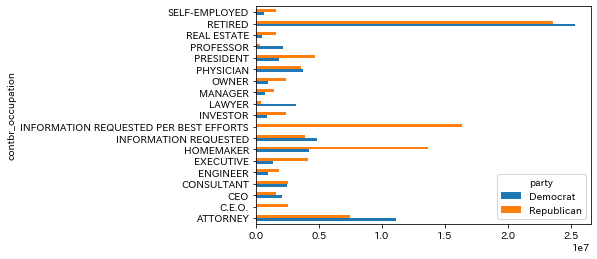

In [60]:
over_2mm.plot(kind='barh')

In [63]:
# 寄付金額の上位を占めた職業や会社について調査

def get_top_amounts(group, key, n=5):
    totals= group.groupby(key)['contb_receipt_amt'].sum()
    return totals.nlargest(n)

grouped = fec_mrbo.groupby('cand_nm')

grouped.apply(get_top_amounts, 'contbr_occupation', n=7)

cand_nm        contbr_occupation                     
Obama, Barack  RETIRED                                   25305116.38
               ATTORNEY                                  11141982.97
               INFORMATION REQUESTED                      4866973.96
               HOMEMAKER                                  4248875.80
               PHYSICIAN                                  3735124.94
               LAWYER                                     3160478.87
               CONSULTANT                                 2459912.71
Romney, Mitt   RETIRED                                   11508473.59
               INFORMATION REQUESTED PER BEST EFFORTS    11396894.84
               HOMEMAKER                                  8147446.22
               ATTORNEY                                   5364718.82
               PRESIDENT                                  2491244.89
               EXECUTIVE                                  2300947.03
               C.E.O.                            

## 14.5.2 寄付金額ごとの分析

In [65]:
# 寄付金額の量で分割
bins = np.array([0,1,10,100,1000,10000,100000,1000000,10000000])
labels = pd.cut(fec_mrbo['contb_receipt_amt'], bins)

labels

411         (10, 100]
412       (100, 1000]
413       (100, 1000]
414         (10, 100]
415         (10, 100]
             ...     
701381      (10, 100]
701382    (100, 1000]
701383        (1, 10]
701384      (10, 100]
701385    (100, 1000]
Name: contb_receipt_amt, Length: 694282, dtype: category
Categories (8, interval[int64]): [(0, 1] < (1, 10] < (10, 100] < (100, 1000] < (1000, 10000] < (10000, 100000] < (100000, 1000000] < (1000000, 10000000]]

In [66]:
# 寄付金額の枠ごとにグループ化して集計

grouped = fec_mrbo.groupby(['cand_nm', labels])
grouped.size().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493.0,77.0
"(1, 10]",40070.0,3681.0
"(10, 100]",372280.0,31853.0
"(100, 1000]",153991.0,43357.0
"(1000, 10000]",22284.0,26186.0
"(10000, 100000]",2.0,1.0
"(100000, 1000000]",3.0,NaN
"(1000000, 10000000]",4.0,NaN


In [68]:
# 寄付の割合を寄付金額の枠ごとに計算
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1), axis=0)
normed_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,NaN
"(1000000, 10000000]",1.000000,NaN


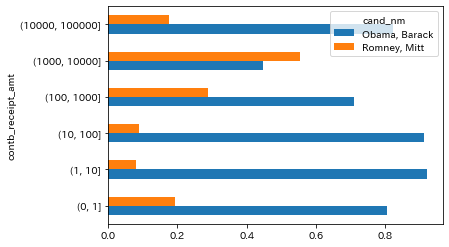

In [70]:
normed_sums[:-2].plot(kind='barh')

## 14.5.3 州ごとの寄付の分析

In [72]:
# 候補者別、かつ州ごとに集計
grouped = fec_mrbo.groupby(['cand_nm', 'contbr_st'])
totals = grouped['contb_receipt_amt'].sum().unstack(0).fillna(0)
totals = totals[totals.sum(1) > 100000]

totals[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,281840.15,86204.24
AL,543123.48,527303.51
AR,359247.28,105556.00
AZ,1506476.98,1888436.23
CA,23824984.24,11237636.60
CO,2132429.49,1506714.12
CT,2068291.26,3499475.45
DC,4373538.80,1025137.50
DE,336669.14,82712.00


In [73]:
# 州ごとに正規化したパーセンテージ表記にする

percent = totals.div(totals.sum(1),axis=0)
percent[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.765778,0.234222
AL,0.507390,0.492610
AR,0.772902,0.227098
AZ,0.443745,0.556255
CA,0.679498,0.320502
CO,0.585970,0.414030
CT,0.371476,0.628524
DC,0.810113,0.189887
DE,0.802776,0.197224
